In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('herb.csv')
features.head(5)

,dem,dist2canal,saltwater_max,groundwater_max,gw_duration,degradation
0,0.49162,2167.071757,-0.313155,-0.065841,0.948087,1
1,0.23643,2145.367101,0.004312,0.185173,0.890411,1
2,0.48290,2128.097742,-0.274469,-0.062764,0.920548,1
3,0.54644,2012.461180,-0.268560,-0.140773,1.000000,1
4,0.00000,2177.016307,0.195966,0.313153,0.800000,1


In [2]:
print('The shape of our features is:', features.shape)

The shape of our features is: (15528, 6)


In [3]:
# Descriptive statistics for each column
features.describe()

,dem,dist2canal,saltwater_max,groundwater_max,gw_duration,degradation
count,15528.000000,15528.000000,15528.000000,15528.000000,15528.000000,15528.000000
mean,0.301437,1431.671609,-0.096711,0.098355,0.605875,0.250386
std,0.285728,1049.244565,0.264882,0.193068,0.319432,0.433250
min,-1.037500,0.000000,-2.271717,-1.619558,0.000000,0.000000
25%,0.146927,602.992537,-0.225874,-0.018399,0.320548,0.000000
50%,0.267480,1332.553939,-0.075725,0.100540,0.654101,0.000000
75%,0.396320,1838.831150,0.073035,0.222079,0.914683,1.000000
max,2.577700,4857.869904,1.256925,1.353135,1.000000,1.000000


In [4]:
features = pd.DataFrame(features)

In [5]:
features

,dem,dist2canal,saltwater_max,groundwater_max,gw_duration,degradation
0,0.491620,2167.071757,-0.313155,-0.065841,0.948087,1
1,0.236430,2145.367101,0.004312,0.185173,0.890411,1
2,0.482900,2128.097742,-0.274469,-0.062764,0.920548,1
3,0.546440,2012.461180,-0.268560,-0.140773,1.000000,1
4,0.000000,2177.016307,0.195966,0.313153,0.800000,1
...,...,...,...,...,...,...
15523,0.430920,3946.568129,-0.122215,-0.028827,0.155864,0
15524,0.017810,3988.984833,0.298047,0.319523,0.897928,0
15525,0.033460,3978.253386,0.282397,0.303873,0.897928,0
15526,0.061830,3967.719748,0.250360,0.333226,0.858466,0


In [6]:
features['degradation'].value_counts()

0    11640
1     3888
Name: degradation, dtype: int64

In [8]:
from sklearn.utils import resample

df_majority = features[features.degradation==0]
df_minority = features[features.degradation==1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=11640,   # to match majority class
                                 random_state=123) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.degradation.value_counts()

0    11640
1    11640
Name: degradation, dtype: int64

In [9]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we "want to predict
labels = np.array(df_upsampled['degradation'])
# Remove the labels from the features
# axis 1 refers to the columns
df_upsampled= df_upsampled.drop('degradation', axis = 1)
# Saving feature names for later use
feature_list = list(df_upsampled.columns)
# Convert to numpy array
features = np.array(df_upsampled)

In [10]:
features.shape

(23280, 5)

In [11]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (17460, 5)
Training Labels Shape: (17460,)
Testing Features Shape: (5820, 5)
Testing Labels Shape: (5820,)


In [13]:
# Import the model we are using
import sklearn.ensemble
clf = sklearn.ensemble.RandomForestRegressor(random_state=21)

In [14]:
param_grid = {'min_samples_split': [2, 5, 10],
              'max_depth': [2, 8, 16],
              'max_features': ['sqrt','log2'],
              'n_estimators': [10,50,100,500,1000,2000],
              'min_samples_leaf': [1, 2, 4]}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
gd_sr = GridSearchCV(estimator=clf,
                     param_grid=param_grid,
                     scoring='r2',
                     cv=KFold(n_splits=3, shuffle=True, random_state=21),
                     error_score="raise")

In [16]:
import warnings

warnings.filterwarnings('ignore')

gd_sr_res = gd_sr.fit(train_features, train_labels)

In [17]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [18]:
best_result = gd_sr.best_score_
print(best_result)

0.8353796758442193


In [19]:
# Import the model we are using
import sklearn.ensemble
# Instantiate model with 10 decision trees
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, random_state=21, min_samples_split = 2,min_samples_leaf = 1, max_depth = 16, max_features = 'sqrt')
# Train the model on training data
clf = clf.fit(train_features, train_labels);

In [20]:
# Use the forest's predict method on the test data
predictions = clf.predict(test_features)
#Assess the accuracy using the validation dataset
print('Accuracy:',clf.score(test_features,test_labels))

Accuracy: 0.9707903780068728


In [21]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dem                  Importance: 0.27
Variable: groundwater_max      Importance: 0.22
Variable: saltwater_max        Importance: 0.21
Variable: dist2canal           Importance: 0.15
Variable: gw_duration          Importance: 0.15


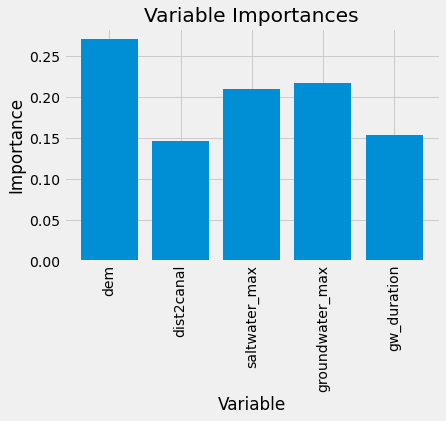

In [22]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [18]:
from sklearn.inspection import permutation_importance

In [19]:
perm_importance = permutation_importance(clf,test_features, test_labels)

In [25]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, perm_importance.importances_mean)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dem                  Importance: 0.381
Variable: groundwater_max      Importance: 0.275
Variable: saltwater_max        Importance: 0.268
Variable: dist2canal           Importance: 0.111
Variable: gw_duration          Importance: 0.103


In [22]:
perm_importance

{'importances_mean': array([0.38123711, 0.1109622 , 0.26773196, 0.27477663, 0.10292096]),
 'importances_std': array([0.00446127, 0.00222015, 0.00294091, 0.00592562, 0.00152137]),
 'importances': array([[0.3790378 , 0.37371134, 0.38453608, 0.3862543 , 0.38264605],
        [0.10962199, 0.11357388, 0.10910653, 0.10876289, 0.1137457 ],
        [0.26804124, 0.27285223, 0.2652921 , 0.26443299, 0.26804124],
        [0.28264605, 0.28006873, 0.26701031, 0.27439863, 0.26975945],
        [0.10463918, 0.10103093, 0.104811  , 0.10206186, 0.10206186]])}